<a href="https://colab.research.google.com/github/sethu-7/Bulldozer-Price-Prediction/blob/main/Bulldozer_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False)

In [ ]:
df.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

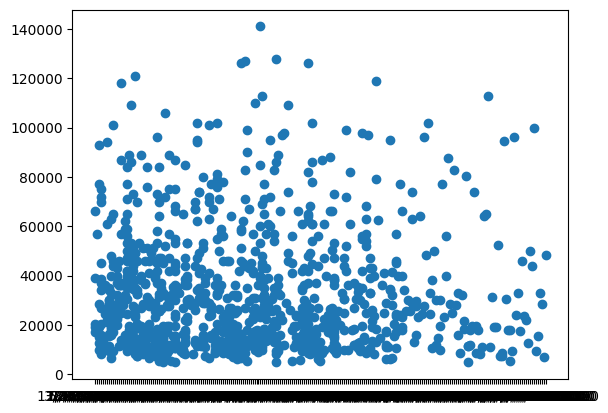

In [ ]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df["SalePrice"][:1000])

<Axes: >

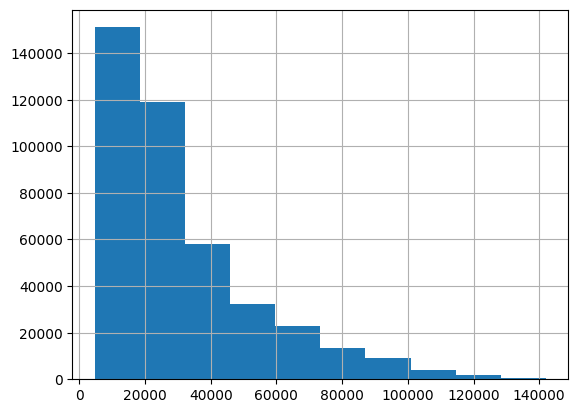

In [ ]:
df.SalePrice.hist()

**Parsing dates**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/bluebook-for-bulldozers/bluebook-for-bulldozers/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [ ]:
df.saledate.dtype

dtype('<M8[ns]')

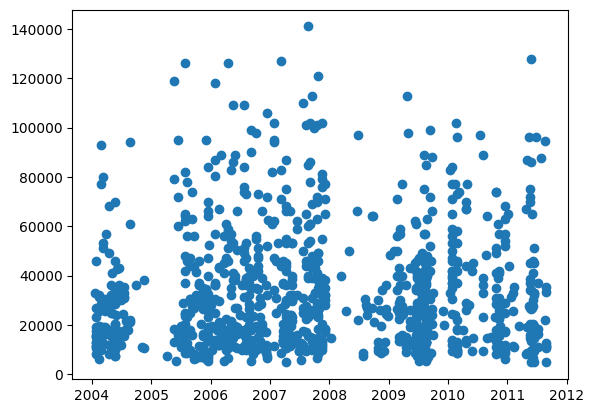

In [ ]:
fig,ax=plt.subplots()
ax.scatter(df['saledate'][:1000],df["SalePrice"][:1000])

**Sort dataframe in date order**

In [ ]:
df_og=df.copy()
df_og

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [ ]:
df.saledate.dt.year

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saledate, Length: 412698, dtype: int64

In [ ]:
df['year']=df.saledate.dt.year
df['month']=df.saledate.dt.month
df['day']=df.saledate.dt.day

In [ ]:
df.drop('saledate',axis=1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,4,28
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,4,28
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,4,28


In [ ]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'year',
       'month', 'day'],
      dtype='object')

##Modellling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 1

See that all are in different dtype formats

In [ ]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label]=content.astype("category").cat.as_ordered()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 56 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 1

In [ ]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)


In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

**Fill missing values**

In [ ]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


auctioneerID
MachineHoursCurrentMeter


In [ ]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            df[label+'_is_missing']=pd.isnull(content)
            df[label]=content.fillna(content.median)


auctioneerID
MachineHoursCurrentMeter


In [ ]:
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


In [ ]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # if pd.isnull(content).sum():
        print(label)


auctioneerID
MachineHoursCurrentMeter
UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
pd.Categorical(df['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [ ]:
pd.Categorical(df['UsageBand']).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [ ]:
for label,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+'_is_missing']=pd.isnull(content)
        df[label]=pd.Categorical(df[label]).codes+1;
        print(label)


auctioneerID
MachineHoursCurrentMeter
UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [ ]:
X=df.drop("SalePrice",axis=1)
Y=df["SalePrice"]

In [ ]:
%%time

rf=RandomForestRegressor(n_jobs=-1)
rf.fit(X,Y)


CPU times: user 20min, sys: 5.83 s, total: 20min 6s
Wall time: 12min 22s


RandomForestRegressor(n_jobs=-1)

In [ ]:
rf.score(X,Y)

0.9878320686651652

**This is not correct because the data has not been split**

##Splitting data##

In [ ]:
df_val=df[df.year==2012]
df_train=df[df.year!=2012]

In [ ]:
x_train,y_train=df_train.drop('SalePrice',axis=1),df_train['SalePrice']
x_val,y_val=df_val.drop('SalePrice',axis=1),df_val['SalePrice']

x_train.shape,y_train.shape,x_val.shape,y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

##Building our Evaluation Model##

**RMSLE :Root Mean Square Log Error**

In [ ]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score

def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))


def show_scores(rf):
    train_preds=rf.predict(x_train)
    val_preds=rf.predict(x_val)
    scores={
        'train mae':mean_absolute_error(y_train,train_preds),
        'val mae':mean_absolute_error(y_val,val_preds),
        'train rmsle':rmsle(y_train,train_preds),
        'val rmsle':rmsle(y_val,val_preds),
        'train r_square':r2_score(y_train,train_preds),
        'val r_square':r2_score(y_val,val_preds)
    }
    return scores



In [ ]:
%%time
rf=RandomForestRegressor(n_jobs=-1,max_samples=1000)
rf.fit(x_train,y_train)

CPU times: user 5.12 s, sys: 827 ms, total: 5.94 s
Wall time: 4.08 s


RandomForestRegressor(max_samples=1000, n_jobs=-1)

In [ ]:
show_scores(rf)

{'train mae': 7506.707809211592,
 'val mae': 9396.758356519484,
 'train rmsle': 0.33625965639915645,
 'val rmsle': 0.38554092719658617,
 'train r_square': 0.7636663610937858,
 'val r_square': 0.7404697242760327}

##Hyper parameter tuning##

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2),"max_samples":[1000],"max_features":[0.5,1,"sqrt",'auto']}

In [ ]:
rf_log=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),param_distributions=rf_grid,cv=5,n_iter=5,verbose=True)

In [ ]:
rf_log.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rf_log.best_params_

{'n_estimators': 110,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': None}

In [ ]:
show_scores(rf_log)

{'train mae': 9042.273257572553,
 'val mae': 10650.742261231424,
 'train rmsle': 0.392450583229063,
 'val rmsle': 0.41542263620231873,
 'train r_square': 0.6643131995814676,
 'val r_square': 0.650478962276277}

In [ ]:
ideal_rf=RandomForestRegressor(n_estimators= 10,
 min_samples_split= 6,
 min_samples_leaf= 1,
 max_samples= None,
 max_features= 'auto',
 max_depth= 10,n_jobs=-1)

In [ ]:
%%time
ideal_rf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


CPU times: user 1min 6s, sys: 279 ms, total: 1min 6s
Wall time: 40.6 s


RandomForestRegressor(max_depth=10, max_features='auto', min_samples_split=6,
                      n_estimators=10, n_jobs=-1)

In [ ]:
show_scores(ideal_rf)

{'train mae': 6443.755943131482,
 'val mae': 7743.609220274182,
 'train rmsle': 0.292596027570489,
 'val rmsle': 0.3125871157321397,
 'train r_square': 0.8191685601420552,
 'val r_square': 0.7971700407526129}

In [ ]:
show_scores(rf)

{'train mae': 7506.707809211592,
 'val mae': 9396.758356519484,
 'train rmsle': 0.33625965639915645,
 'val rmsle': 0.38554092719658617,
 'train r_square': 0.7636663610937858,
 'val r_square': 0.7404697242760327}

**Trying on test set**

In [ ]:
df_test=pd.read_csv("/content/drive/MyDrive/bluebook-for-bulldozers/bluebook-for-bulldozers/Test.csv",low_memory=False,parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [ ]:
# test_preds=ideal_rf.predict(df_test)

In [ ]:
def preprocess(df):
    df['year']=df.saledate.dt.year
    df['month']=df.saledate.dt.month
    df['day']=df.saledate.dt.day
    df.drop('saledate',axis=1)

    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                print(label)
                df[label+'_is_missing']=pd.isnull(content)
                df[label]=content.fillna(content.median)


    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing']=pd.isnull(content)
            df[label]=pd.Categorical(df[label]).codes+1;
            print(label)

    return df






In [ ]:
df_test=preprocess(df_test)

MachineHoursCurrentMeter
MachineHoursCurrentMeter
UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,1,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,2,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,3,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,4,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,5,2,9,566,...,True,True,True,True,True,False,False,False,True,True


In [ ]:
set(x_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [ ]:
df_test['auctioneerID_is_missing']=False

In [ ]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerrID_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,1,2,3,499,...,True,True,True,True,True,True,True,True,False,False
1,1227844,1022817,7271,121,3,1000,2,1,9,831,...,True,True,True,True,True,True,False,False,False,False
2,1227847,1031560,22805,121,3,2004,3,3,9,1177,...,False,False,False,True,True,True,True,True,False,False
3,1227848,56204,1269,121,3,2006,4,1,9,287,...,False,False,False,True,True,True,True,True,False,False
4,1227863,1053887,22312,121,3,2005,5,2,9,566,...,True,True,True,False,False,False,True,True,False,False


In [ ]:
df_test.drop('auctioneerrID_is_missing',axis=1)

In [ ]:
test_preds=ideal_rf.predict(df_test)

In [ ]:
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,"importances":importances}).sort_values('importances',ascending=True).reset_index(drop=True))

    fig,ax=plt.subplots()
    ax.barh(df['features'][:n],df[importances][:20])

KeyError: ignored

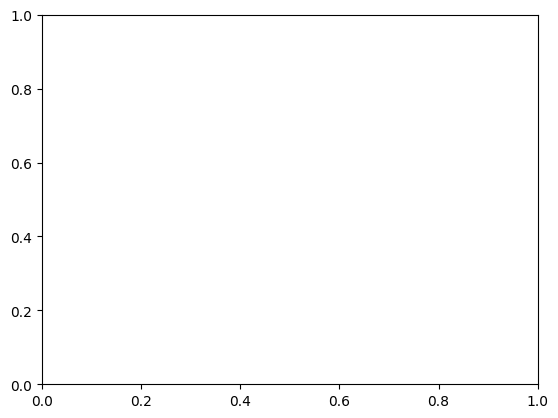

In [ ]:
plot_features(x_train.columns,ideal_rf.feature_importances_)

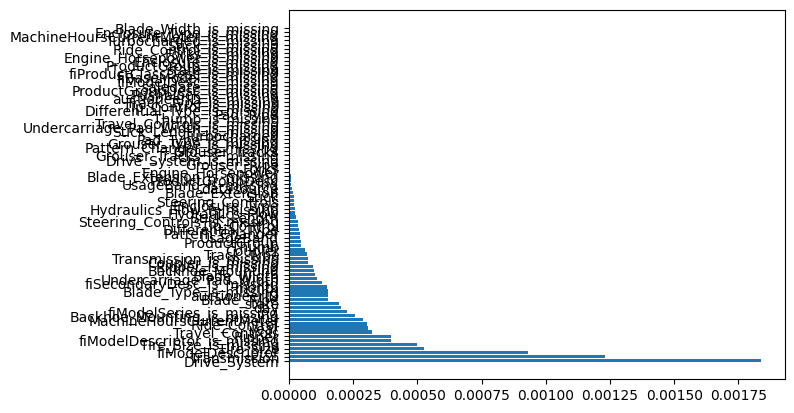

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, "importances": importances}).sort_values('importances', ascending=False).reset_index(drop=True))

    fig, ax = plt.subplots()
    ax.barh(df['features'][20:], df['importances'][20:])  # Fix here

# Assuming x_train is your training data and ideal_rf is your RandomForest model
plot_features(x_train.columns, ideal_rf.feature_importances_)
